In [1]:
import gym 
env = gym.make("Taxi-v3", render_mode="ansi")


In [2]:
#Random State 
state, info = env.reset()
print("Initial State:", state)
print("Action Space:", env.action_space)
print("State Space:", env.observation_space)


Initial State: 242
Action Space: Discrete(6)
State Space: Discrete(500)


In [4]:
#Random action
action = env.action_space.sample()
next_state, reward, terminated, truncated, info = env.step(action)

print("Action taken:", action)
print("Next state:", next_state)
print("Reward received:", reward)
print("Episode done?", terminated or truncated)


Action taken: 4
Next state: 262
Reward received: -10
Episode done? False


In [5]:
print(env.render())


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)



In [6]:
import numpy as np

# Initialize Q-table with all zeros
q_table = np.zeros((500, 6))


In [7]:
#Parameters
alpha = 0.1     #Learning Rate
gamma = 0.95    #Discount Factor


#### Q-learning formula

The Q-learning update rule is:

$$
\text{new\_q} = \text{current\_q} + \alpha \left( \text{reward} + \gamma \cdot \max(\text{future\_q}) - \text{current\_q} \right)
$$

In [8]:
num_episodes = 10000
epsilon = 0.1
min_epsilon = 0.01
decay_rate = 0.995

### **TRAINING** using 'epsilon-greedy' algorithm 

In [9]:
import random as random
steps_per_episode = []
penalties_per_episode = []
total_reward_per_episode = []
for episode in range(num_episodes):
    state, _ = env.reset()
    done = False
    total_reward = 0
    penalties =0
    steps = 0


    while not done:
        # Choose action: epsilon-greedy strategy
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(q_table[state])  # Exploit

        # Take action and observe outcome
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        steps += 1

        # Q-value update
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        q_table[state, action] = old_value + alpha * (reward + gamma * next_max - old_value)

        # Bookkeeping
        total_reward += reward
        if reward == -10:
            penalties += 1
        state = next_state
    
    steps_per_episode.append(steps)
    penalties_per_episode.append(penalties)
    total_reward_per_episode.append(total_reward)
    epsilon = max(min_epsilon, epsilon * decay_rate)



### Average reward , penalty and steps

In [10]:
print("Average steps per episode:", np.mean(steps_per_episode))
print("Average penalties per episode:", np.mean(penalties_per_episode)) 
print("Average total reward per episode:", np.mean(total_reward_per_episode))

Average steps per episode: 20.7478
Average penalties per episode: 0.4127
Average total reward per episode: -3.817


### First 10 values of reward, penalties and steps taken

In [11]:
print(total_reward_per_episode[:10])
print(steps_per_episode[:10])
print(penalties_per_episode[:10])

[-542, -560, -506, -353, -470, -569, -506, -389, -416, -533]
[200, 200, 200, 200, 200, 200, 200, 200, 200, 200]
[38, 40, 34, 17, 30, 41, 34, 21, 24, 37]


### Last 10 values of reward, penalties and steps taken

In [12]:
print(total_reward_per_episode[num_episodes-10:])
print(steps_per_episode[num_episodes-10:])
print(penalties_per_episode[num_episodes-10:])

[7, 6, 10, 8, 10, 8, 7, 5, 7, 9]
[14, 15, 11, 13, 11, 13, 14, 16, 14, 12]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### **Graphs**

In [13]:
import matplotlib.pyplot as plt
import pandas as pd


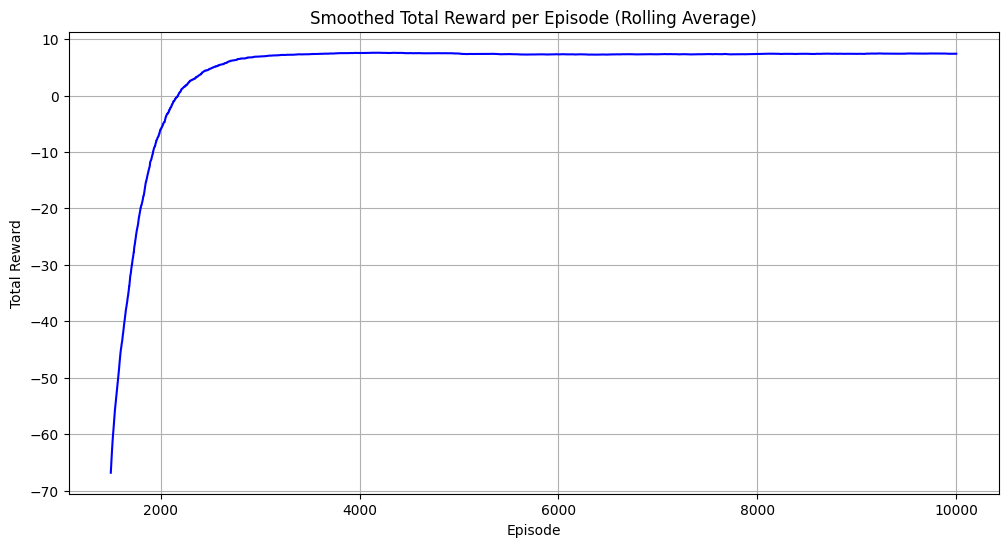

In [14]:
rolling_rewards = pd.Series(total_reward_per_episode).rolling(window=1500).mean()

plt.figure(figsize=(12, 6))
plt.plot(rolling_rewards, color='blue')
plt.title("Smoothed Total Reward per Episode (Rolling Average)")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.show()


## **Observation**
Since in starting model is learning there are higher penalties and also more steps and hence reward is negative. But after around 2000 episodes model learns about illegal pickup / drop off and rewards tend to become positive as episodes increase. Rewards converge around 8 , it is because some reward is subtracted from 20 in terms of steps taken to reach the destination

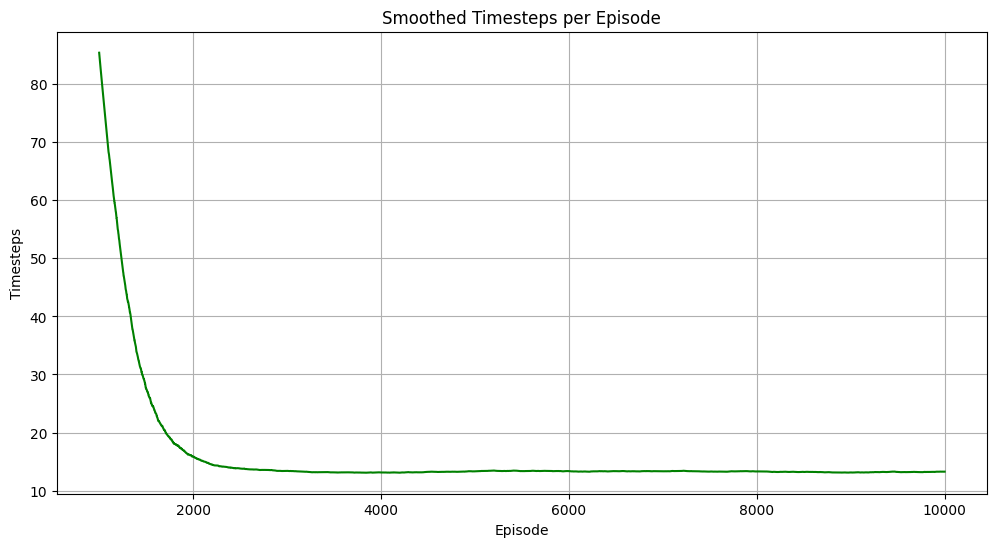

In [15]:
rolling_steps = pd.Series(steps_per_episode).rolling(window=1000).mean()

plt.figure(figsize=(12, 6))
plt.plot(rolling_steps, color='green')
plt.title("Smoothed Timesteps per Episode")
plt.xlabel("Episode")
plt.ylabel("Timesteps")
plt.grid(True)
plt.show()


## **Observation**
Since in starting model is learning it takes more steps to reach the destination as model does not has idea to how to reach to destination, it explores and updates q value in each step and as number of episodes increase model performs better and learns to take steps leading to destination 

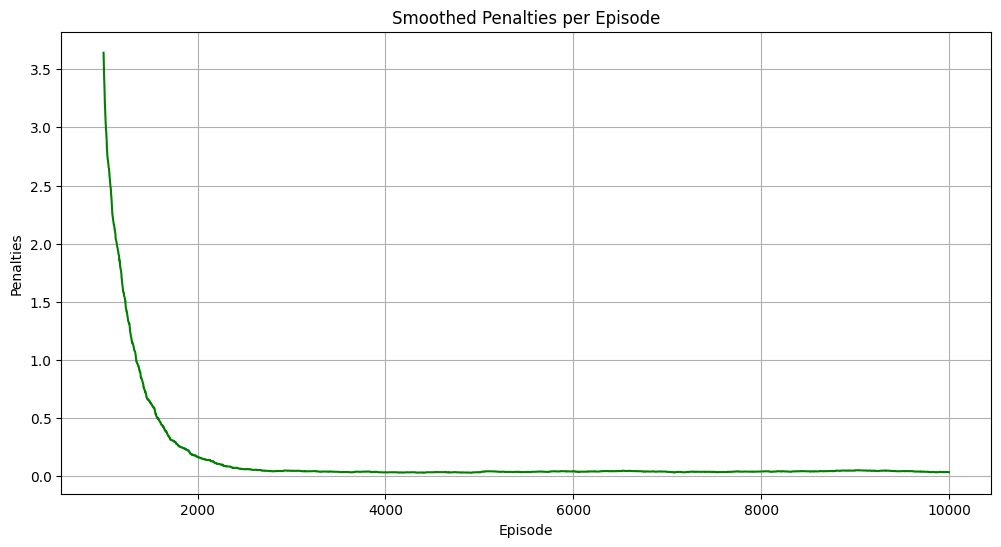

In [16]:
rolling_steps = pd.Series(penalties_per_episode).rolling(window=1000).mean()

plt.figure(figsize=(12, 6))
plt.plot(rolling_steps, color='green')
plt.title("Smoothed Penalties per Episode")
plt.xlabel("Episode")
plt.ylabel("Penalties")
plt.grid(True)
plt.show()


## **Observation**
Since in starting model performs random action it receives large penalties and hence learns quickly to avoid it and as the number of episodes increase the penalties received converge to 0

### **EVALUATION**

In [17]:
num_episodes = 100

In [18]:
import random as random
steps_per_episode = []
penalties_per_episode = []
total_reward_per_episode = []
for episode in range(num_episodes):
    state, _ = env.reset()
    done = False
    total_reward = 0
    penalties =0
    steps = 0


    while not done:
        action = np.argmax(q_table[state])  # Exploit

        # Take action and observe outcome
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        steps += 1

        # Q-value update
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        q_table[state, action] = old_value + alpha * (reward + gamma * next_max - old_value)

        # Bookkeeping
        total_reward += reward
        if reward == -10:
            penalties += 1
        state = next_state
    
    steps_per_episode.append(steps)
    penalties_per_episode.append(penalties)
    total_reward_per_episode.append(total_reward)
    epsilon = max(min_epsilon, epsilon * decay_rate)



### **Visualisation using graph** 

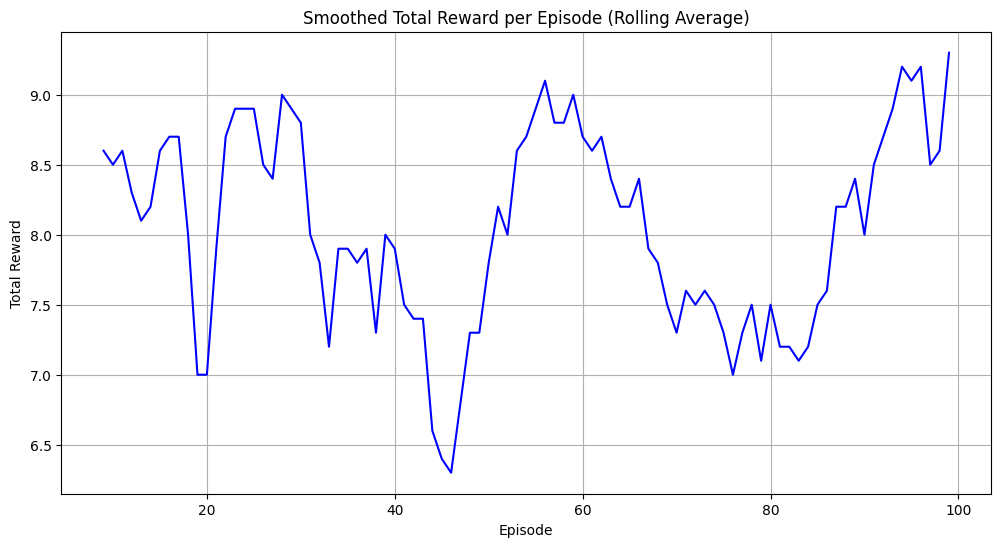

In [19]:
rolling_rewards = pd.Series(total_reward_per_episode).rolling(window=10).mean()

plt.figure(figsize=(12, 6))
plt.plot(rolling_rewards, color='blue')
plt.title("Smoothed Total Reward per Episode (Rolling Average)")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.show()


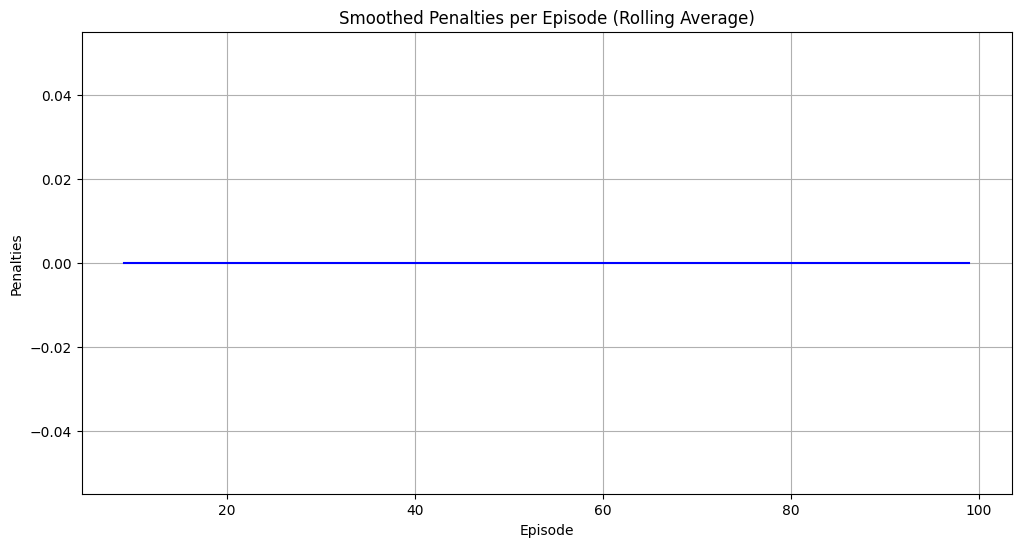

In [20]:
rolling_rewards = pd.Series(penalties_per_episode).rolling(window=10).mean()

plt.figure(figsize=(12, 6))
plt.plot(rolling_rewards, color='blue')
plt.title("Smoothed Penalties per Episode (Rolling Average)")
plt.xlabel("Episode")
plt.ylabel("Penalties")
plt.grid(True)
plt.show()


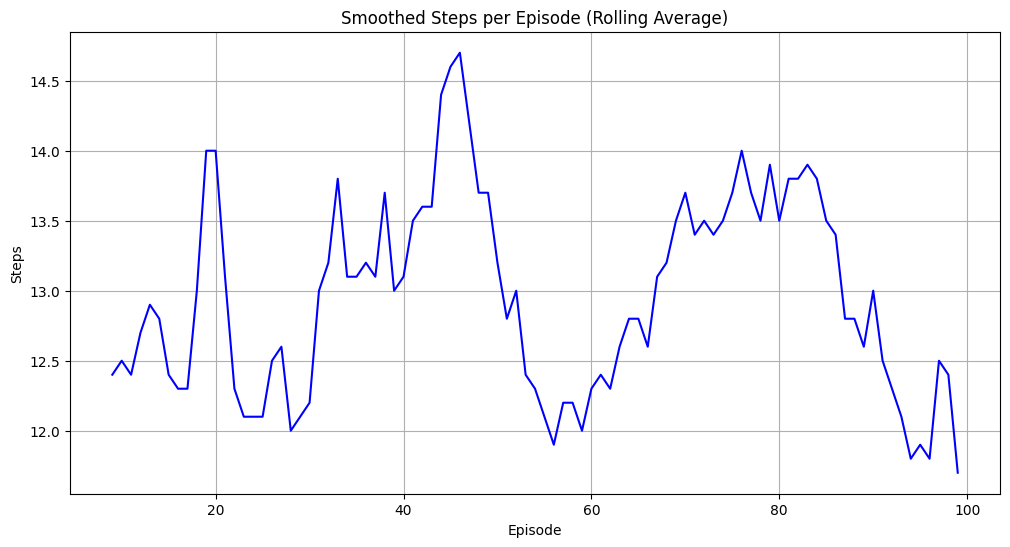

In [21]:
rolling_rewards = pd.Series(steps_per_episode).rolling(window=10).mean()

plt.figure(figsize=(12, 6))
plt.plot(rolling_rewards, color='blue')
plt.title("Smoothed Steps per Episode (Rolling Average)")
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.grid(True)
plt.show()


### **Hyperparameter tuning** 

In [22]:
alpha_values = [0.01, 0.1, 0.5]
gamma_values = [0.1, 0.5, 0.9]
epsilon_values = [0.1, 0.5, 0.9]

In [23]:
for alpha in alpha_values:
    for gamma in gamma_values:
        for epsilon in epsilon_values:
            print(f"Running with alpha={alpha}, gamma={gamma}, epsilon={epsilon}")
            # Reset Q-table
            Q_table = np.zeros((500, 6))
            num_episodes = 10000
            
            steps_per_episode = []
            penalties_per_episode = []
            total_reward_per_episode = []
            
            for episode in range(num_episodes):
                state, _ = env.reset()
                done = False
                total_reward = 0
                penalties = 0
                steps = 0

                while not done:
                    if random.uniform(0, 1) < epsilon:
                        action = env.action_space.sample()  # Explore
                    else:
                        action = np.argmax(Q_table[state])  # Exploit

                    next_state, reward, terminated, truncated, _ = env.step(action)
                    done = terminated or truncated
                    steps += 1

                    old_value = Q_table[state, action]
                    next_max = np.max(Q_table[next_state])
                    Q_table[state, action] = old_value + alpha * (reward + gamma * next_max - old_value)

                    total_reward += reward
                    if reward == -10:
                        penalties += 1
                    state = next_state
                
                steps_per_episode.append(steps)
                penalties_per_episode.append(penalties)
                total_reward_per_episode.append(total_reward)

            print(f"Average Reward: {np.mean(total_reward_per_episode)}")
            print(f"Average Steps: {np.mean(steps_per_episode)}")
            print(f"Average Penalties: {np.mean(penalties_per_episode)}\n")

Running with alpha=0.01, gamma=0.1, epsilon=0.1
Average Reward: -221.278
Average Steps: 175.0102
Average Penalties: 5.8439

Running with alpha=0.01, gamma=0.1, epsilon=0.5
Average Reward: -441.0068
Average Steps: 181.4804
Average Penalties: 29.3692

Running with alpha=0.01, gamma=0.1, epsilon=0.9
Average Reward: -689.6829
Average Steps: 190.8087
Average Penalties: 55.7128

Running with alpha=0.01, gamma=0.5, epsilon=0.1
Average Reward: -140.4865
Average Steps: 118.8337
Average Penalties: 4.1057

Running with alpha=0.01, gamma=0.5, epsilon=0.5
Average Reward: -317.8459
Average Steps: 134.5363
Average Penalties: 21.7906

Running with alpha=0.01, gamma=0.5, epsilon=0.9
Average Reward: -647.4095
Average Steps: 180.6344
Average Penalties: 52.4477

Running with alpha=0.01, gamma=0.9, epsilon=0.1
Average Reward: -93.6218
Average Steps: 81.905
Average Penalties: 3.2719

Running with alpha=0.01, gamma=0.9, epsilon=0.5
Average Reward: -230.6947
Average Steps: 100.4086
Average Penalties: 16.2722


### **Observations from Hyperparameter Tuning Results**

**Learning Rate ($\alpha$):**  Higher values of $\alpha$ (0.5) consistently lead to better performance (higher average rewards, fewer steps, and fewer penalties) compared to lower values (0.01, 0.1).

**Discount Factor ($\gamma$):** Increasing $\gamma$ improves performance, especially when combined with higher $\alpha$. $\gamma$=0.9 generally yields the best results, as it encourages the agent to consider long-term rewards.

**Exploration Rate ($\epsilon$):** Lower $\epsilon$ (0.1) results in better performance, as the agent exploits learned policies more often. Higher $\epsilon$ (0.9) leads to poor performance, with more steps and penalties, since the agent explores too much and does not leverage its learning.

**Best Combination:** The best results are observed with $\alpha$=0.5, $\gamma$=0.9, and $\epsilon$=0.1, where the agent achieves the highest average reward (-1.528), the fewest steps per episode (17.03), and the lowest penalties (0.5986).

**General Trend:** As $\alpha$ and $\gamma$ increase and $\epsilon$ decreases, the agents performance improves, showing faster and more efficient learning with fewer mistakes.

**High $\epsilon$:** For all $\alpha$ and $\gamma$ values, high $\epsilon$ (0.9) leads to significantly worse performance, highlighting the importance of balancing exploration and exploitation.

**Conclusion:**  
A high learning rate, high discount factor, and low exploration rate yield the best results for the Taxi-v3 environment using Q-learning.

### Visualisation

In [24]:
import time
from IPython.display import clear_output

state, _ = env.reset()   
done = False

while not done:
    clear_output(wait=True)    
    print(env.render())                
    time.sleep(0.7)             

    action = np.argmax(q_table[state])   
    next_state, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated

    state = next_state


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

